# Пример создания сверточных и пуллинг слоев

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D


tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

(8, 9)


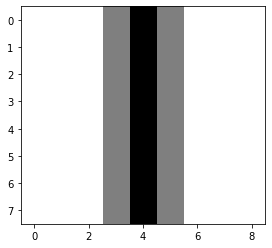

In [2]:
# определение входных данных
data = [[0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0],
            [0, 0, 0, 1, 2, 1, 0, 0, 0]]

data = np.asarray(data).astype(np.float64)
print(data.shape)
plt.imshow(data, cmap='binary', vmin=0, vmax=2)

In [4]:
data = data.reshape(1, 8, 9, 1)

In [10]:
max_pooling = MaxPooling2D(pool_size=(1, 3), strides=(1, 2))
avg_pooling = AveragePooling2D(pool_size=(1, 3), strides=(1, 2))

(1, 8, 4, 1)
[[0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]
 [0. 2. 2. 0.]]


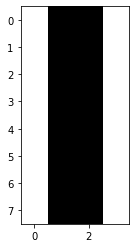

In [11]:
max_pooling_data = max_pooling(data)
print(max_pooling_data.shape)
_, h, w, _ = max_pooling_data.shape
plt.imshow(max_pooling_data.numpy().reshape(h, w), cmap='binary', vmin=0, vmax=2)
print(max_pooling_data.numpy().reshape(h, w))

(1, 8, 4, 1)
[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]


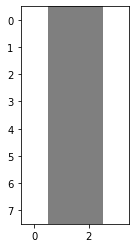

In [12]:
avg_pooling_data = avg_pooling(data)
print(avg_pooling_data.shape)
_, h, w, _ = avg_pooling_data.shape
plt.imshow(avg_pooling_data.numpy().reshape(h, w), cmap='binary', vmin=0, vmax=2)
print(avg_pooling_data.numpy().reshape(h, w))

In [13]:
img = [[[0, 1, 0, 0, 0, 0, 0, 0], 
      [0, 1, 0, 0, 0, 0, 0, 0],
      [0, 1, 0, 0, 0, 0, 0, 0],
      [0, 1, 0, 0, 0, 0, 0, 0],
      [0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 1, 1, 1, 1, 0],
      [0, 0, 0, 0, 0, 0, 0, 0]]]

In [14]:
img = np.expand_dims(np.array(img), -1)

In [15]:
img.shape

(1, 8, 8, 1)

In [18]:
# создание модели
model = Sequential()
model.add(Conv2D(1, (3, 3), activation=None, input_shape=(8, 8, 1)))

# вывод описания созданной модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [19]:
detector = np.zeros((3, 3, 1, 1))
detector[1, :, :, :] = 1

In [20]:
detector.squeeze()

array([[0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.]])

In [21]:
# определение дектора вертикальной линии
weights =[detector, np.asarray([0.0])]
# сохранение весов в модель
model.set_weights(weights)

In [22]:
yhat = model.predict(img)
yhat.shape

1/1 [==============================] - 4s 4s/step


(1, 6, 6, 1)

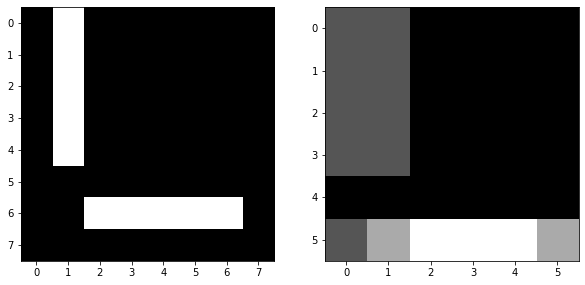

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 20))
axes[0].imshow(img[0], cmap='gray')
axes[1].imshow(yhat.reshape(6, 6), cmap='gray')

In [24]:
detector = np.zeros((3, 3, 1, 1))
detector[:, 1, :, :] = 1

In [25]:
detector.squeeze()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [26]:
# определение дектора вертикальной линии
weights = [detector, np.asarray([0.0])]
# сохранение весов в модель
model.set_weights(weights)

In [27]:
yhat = model.predict(img)
yhat.shape

1/1 [==============================] - 0s 34ms/step


(1, 6, 6, 1)

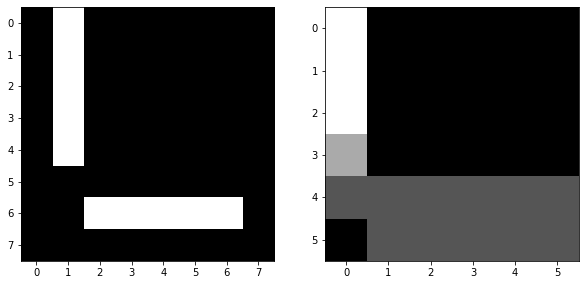

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 20))
axes[0].imshow(img[0], cmap='gray')
axes[1].imshow(yhat.reshape(6, 6), cmap='gray')

# Нейронная сеть Lenet5

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow import keras

In [30]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [31]:
len(x_train), len(x_test)

(60000, 10000)

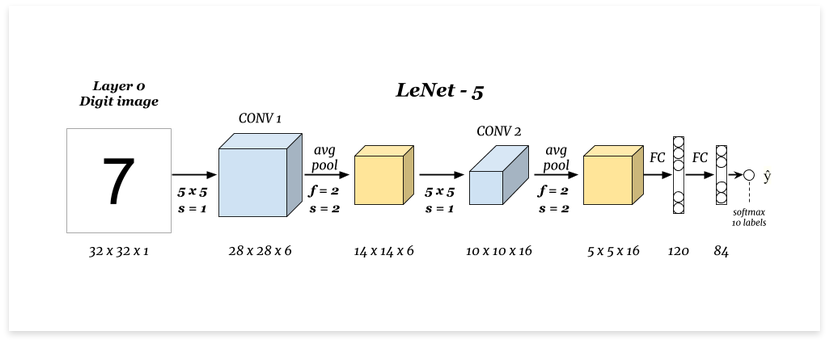

In [32]:
# инициализация пустой модели
model = Sequential()

convolutional = Sequential([
                            layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)),
                            layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
                            layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),
                            layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
])

linear = Sequential([
                            layers.Flatten(),
                            layers.Dense(120, activation='tanh'),
                            layers.Dense(84, activation='tanh'),
                            layers.Dense(10, activation='softmax')
])


model.add(convolutional)
model.add(linear)

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 4, 4, 16)          2572      
                                                                 
 sequential_3 (Sequential)   (None, 10)                41854     
                                                                 
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
_________________________________________________________________


In [34]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# пятый полносвязный слой
model.add(layers.Dense(120, activation='tanh'))

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_5 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_6 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [36]:
# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

hist = model.fit(x=x_train, y=y_train, epochs=2, batch_size=128, verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))


Epoch 1/2
469/469 [==============================] - 9s 16ms/step - loss: 1.2012 - accuracy: 0.7132
Epoch 2/2
313/313 [==============================] - 3s 8ms/step - loss: 0.4052 - accuracy: 0.8912
Test loss 0.4052, accuracy 89.12%


# Более сложная нейронная сеть

In [12]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

In [8]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [9]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [14]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)

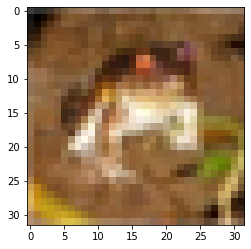

In [15]:
plt.imshow(x_train[0])

In [16]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [17]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

C:\Users\Pirozhok\Documents\geekbrains\введение в нейронные сети\venv\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [18]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5


C:\Users\Pirozhok\AppData\Local\Temp\ipykernel_4564\3559863638.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


391/391 [==============================] - 39s 63ms/step - loss: 2.0069 - accuracy: 0.2585 - val_loss: 1.7504 - val_accuracy: 0.3860
Epoch 2/5
391/391 [==============================] - 25s 63ms/step - loss: 1.7549 - accuracy: 0.3636 - val_loss: 1.6043 - val_accuracy: 0.4259
Epoch 3/5
391/391 [==============================] - 20s 51ms/step - loss: 1.6444 - accuracy: 0.4028 - val_loss: 1.5360 - val_accuracy: 0.4471
Epoch 4/5
391/391 [==============================] - 21s 53ms/step - loss: 1.5663 - accuracy: 0.4290 - val_loss: 1.4388 - val_accuracy: 0.4823
Epoch 5/5
391/391 [==============================] - 21s 54ms/step - loss: 1.5115 - accuracy: 0.4529 - val_loss: 1.3662 - val_accuracy: 0.5053


In [19]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как C:\Users\Pirozhok\Documents\geekbrains\введение в нейронные сети\saved_models\keras_cifar10_trained_model.h5 


In [20]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 1.3662 - accuracy: 0.5053
Test loss: 1.3661986589431763
Test accuracy: 0.505299985408783


# ResNet и Inception

## resnet

https://neurohive.io/ru/vidy-nejrosetej/resnet-34-50-101/

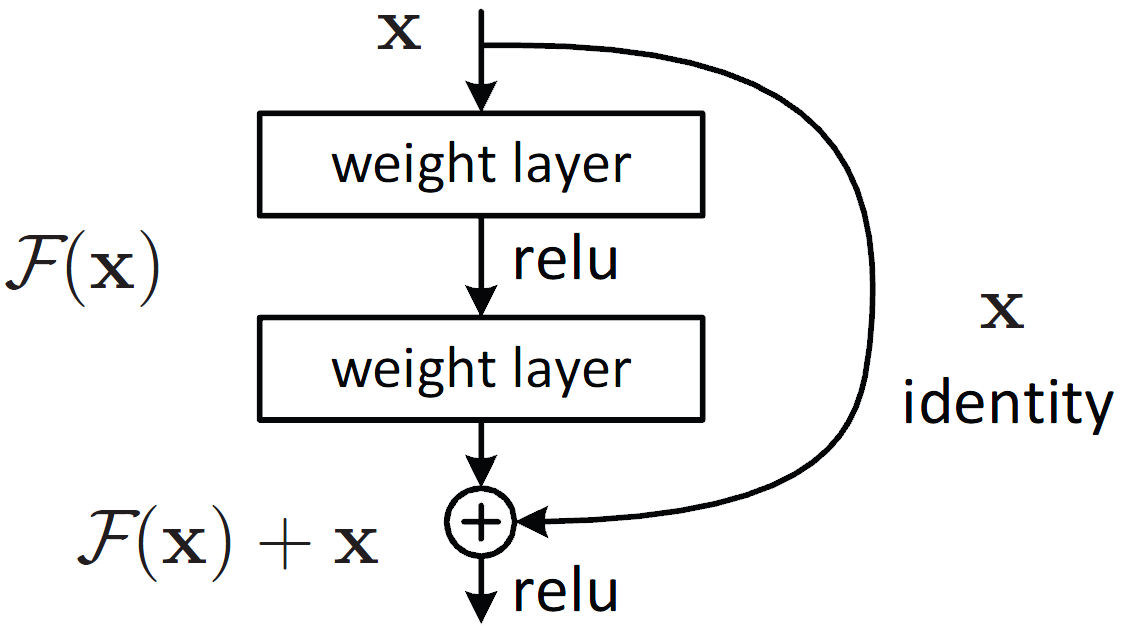

In [23]:
import tensorflow as tf

In [26]:
model = tf.keras.applications.resnet.ResNet50(weights='imagenet')

In [27]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

## inception

https://habr.com/ru/post/301084/

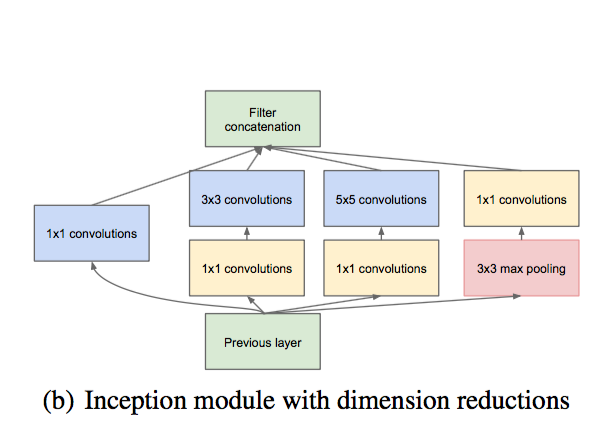

In [28]:
model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet')

In [29]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_4[0][0]']               
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_11[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_15[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_28 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_24 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_27 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_28[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_32[0][0]',          
                                                                  'activation_35[0][0]',          
                                                                  'max_pooling2d_4[0][0]']        
                                                                                                  
 conv2d_38 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_38[0][0]']              
 ormalizat

                                                                  'activation_45[0][0]']          
                                                                                                  
 conv2d_48 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_48[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_50 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_49 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_50[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_60 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_59 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_60[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_59[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_71 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_65 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_71[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_79[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_78[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_84 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_88 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_89 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_97 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_98 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_97[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 